# Life Expectancy and GDP
## Author: Parker Holt

## Introduction

Analysis on Life Expectancy and GDP of 6 Countries: 
1. Chile 
2. China
3. Germany
4. Mexico
5. United States of America
6. Zimbabwe

Objectives: 

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

## Importing Python Modules and Inspecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('all_data.csv')

data.rename(columns={'Life expectancy at birth (years)' : 'life_year'}, inplace=True)
print(data.head())

  Country  Year  life_year           GDP
0   Chile  2000       77.3  7.786093e+10
1   Chile  2001       77.3  7.097992e+10
2   Chile  2002       77.8  6.973681e+10
3   Chile  2003       77.9  7.564346e+10
4   Chile  2004       78.0  9.921039e+10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    96 non-null     object 
 1   Year       96 non-null     int64  
 2   life_year  96 non-null     float64
 3   GDP        96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
print(data.Country.unique())

chile = data[data.Country == 'Chile']
china = data[data.Country == 'China']
germany = data[data.Country == 'Germany']
mexico = data[data.Country == 'Mexico']
usa = data[data.Country == 'United States of America']
zimb = data[data.Country == 'Zimbabwe']

countries = [country for country in data.Country.unique()]
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


Countries: 
1. Chile 
2. China
3. Germany
4. Mexico
5. United States of America
6. Zimbabwe

## Life Expectancy over Time

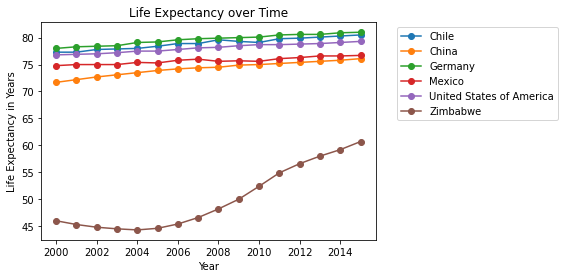

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(chile.Year, chile.life_year, marker = 'o')
plt.plot(china.Year, china.life_year, marker = 'o')
plt.plot(germany.Year, germany.life_year, marker = 'o')
plt.plot(mexico.Year, mexico.life_year, marker = 'o')
plt.plot(usa.Year, usa.life_year, marker = 'o')
plt.plot(zimb.Year, zimb.life_year, marker = 'o')
plt.legend(countries, bbox_to_anchor=(1.05, 1))
plt.title('Life Expectancy over Time')
plt.ylabel('Life Expectancy in Years')
plt.xlabel('Year')
plt.show()
plt.clf()

The line chart show that Zimbabwe is relatively lower in life expectancy to other countries.

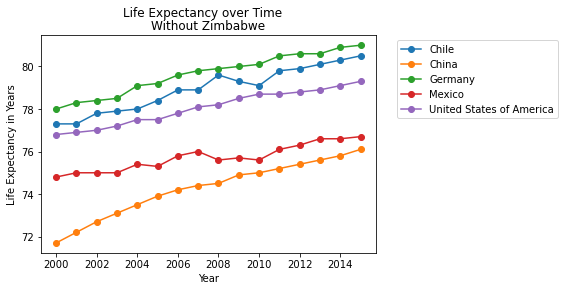

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(chile.Year, chile.life_year, marker = 'o')
plt.plot(china.Year, china.life_year, marker = 'o')
plt.plot(germany.Year, germany.life_year, marker = 'o')
plt.plot(mexico.Year, mexico.life_year, marker = 'o')
plt.plot(usa.Year, usa.life_year, marker = 'o')
plt.legend(countries[0:5], bbox_to_anchor=(1.05, 1))
plt.suptitle('Life Expectancy over Time')
plt.title('Without Zimbabwe')
plt.ylabel('Life Expectancy in Years')
plt.xlabel('Year')
plt.show()
plt.clf()

Both line charts show that life expectancy do increase over time.

## GDP over Time

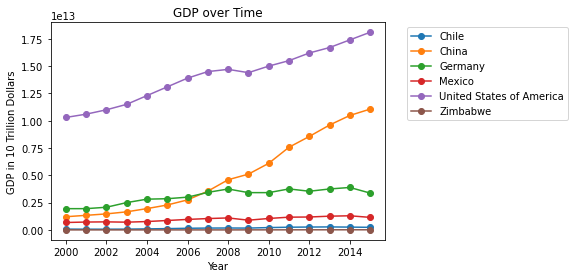

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(chile.Year, chile.GDP, marker = 'o')
plt.plot(china.Year, china.GDP, marker = 'o')
plt.plot(germany.Year, germany.GDP, marker = 'o')
plt.plot(mexico.Year, mexico.GDP, marker = 'o')
plt.plot(usa.Year, usa.GDP, marker = 'o')
plt.plot(zimb.Year, zimb.GDP, marker = 'o')
plt.legend(countries, bbox_to_anchor=(1.05, 1))
plt.title('GDP over Time')
plt.xlabel('Year')
plt.ylabel('GDP in 10 Trillion Dollars')
plt.show()
plt.clf()

The line chart shows that United States of America (USA) and China have higher GDP compared to other countries. The visualization will require separating countries based on their relativity for GDP over time.

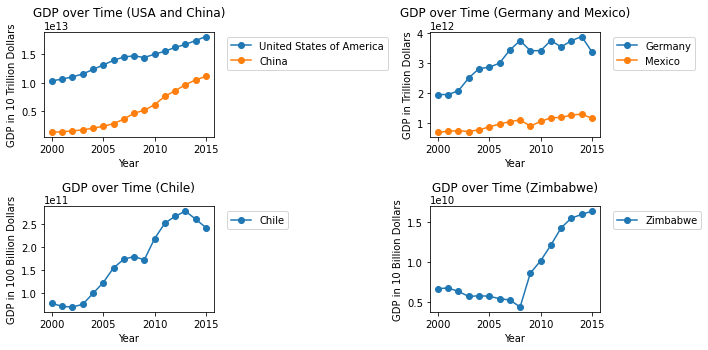

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(usa.Year, usa.GDP, marker = 'o')
plt.plot(china.Year, china.GDP, marker = 'o')
plt.legend([countries[4], countries[1]], bbox_to_anchor=(1.05, 1))
plt.title('GDP over Time (USA and China)', y=1.1, pad=5)
plt.xlabel('Year')
plt.ylabel('GDP in 10 Trillion Dollars')
plt.subplot(2,2,2)
plt.plot(germany.Year, germany.GDP, marker = 'o')
plt.plot(mexico.Year, mexico.GDP, marker = 'o')
plt.legend([countries[2], countries[3]], bbox_to_anchor=(1.05, 1))
plt.title('GDP over Time (Germany and Mexico)', y=1.1, pad=5)
plt.xlabel('Year')
plt.ylabel('GDP in Trillion Dollars')
plt.subplot(2,2,3)
plt.plot(chile.Year, chile.GDP, marker = 'o')
plt.legend([countries[0], countries[5]], bbox_to_anchor=(1.05, 1))
plt.title('GDP over Time (Chile)', y=1.1, pad=5)
plt.xlabel('Year')
plt.ylabel('GDP in 100 Billion Dollars')
plt.subplot(2,2,4)
plt.plot(zimb.Year, zimb.GDP, marker = 'o')
plt.legend([countries[5]], bbox_to_anchor=(1.05, 1))
plt.title('GDP over Time (Zimbabwe)', y=1.1, pad=5)
plt.xlabel('Year')
plt.ylabel('GDP in 10 Billion Dollars')
plt.tight_layout()
plt.show()
plt.clf()

All line charts show GDP increase over time for all countries.

## Correlation between GDP and Life Expectancy of All Countries

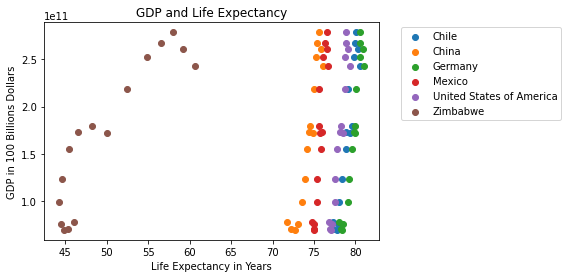

<Figure size 432x288 with 0 Axes>

In [9]:
# ScatterPlot of all 6 countries

plt.scatter(chile.life_year, chile.GDP)
plt.scatter(china.life_year, chile.GDP)
plt.scatter(germany.life_year, chile.GDP)
plt.scatter(mexico.life_year, chile.GDP)
plt.scatter(usa.life_year, chile.GDP)
plt.scatter(zimb.life_year, chile.GDP)
plt.legend(countries, bbox_to_anchor=(1.05, 1))
plt.title('GDP and Life Expectancy')
plt.ylabel('GDP in 100 Billions Dollars')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()

The scatter plot show that Zimbabwe is relatively lower in life expectancy to other countries.

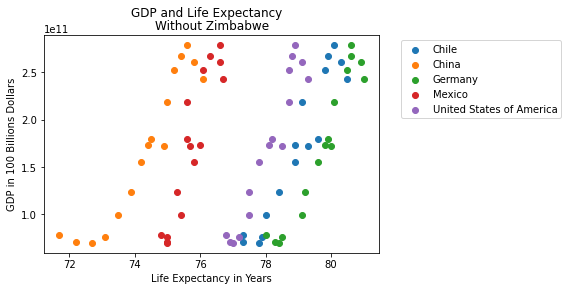

In [10]:
plt.scatter(chile.life_year, chile.GDP)
plt.scatter(china.life_year, chile.GDP)
plt.scatter(germany.life_year, chile.GDP)
plt.scatter(mexico.life_year, chile.GDP)
plt.scatter(usa.life_year, chile.GDP)
plt.legend(countries[0:5], bbox_to_anchor=(1.05, 1))
plt.suptitle('GDP and Life Expectancy')
plt.title('Without Zimbabwe')
plt.ylabel('GDP in 100 Billions Dollars')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.close()

A scatter plot showing all countries without Zimbabwe.

In [11]:
print('Pearson Coefficient for all countries')
print()
chile_corr = chile.corr()
print('Chile: ' + str(chile_corr.GDP[1]))
china_corr = china.corr()
print('China: ' + str(china_corr.GDP[1]))
germany_corr = germany.corr()
print('Germany: ' + str(germany_corr.GDP[1]))
mexico_corr = mexico.corr()
print('Mexico: ' + str(mexico_corr.GDP[1]))
usa_corr = usa.corr()
print('United States of America: ' + str(usa_corr.GDP[1]))
zimb_corr = zimb.corr()
print('Zimbabwe: ' + str(zimb_corr.GDP[1]))


Pearson Coefficient for all countries

Chile: 0.9498766659254405
China: 0.9085255408648352
Germany: 0.9326988982561285
Mexico: 0.9322377167847088
United States of America: 0.9817092382430266
Zimbabwe: 0.9661998955858776


Pearson Coefficient for all countries show a strong positive relationship between life expectancy and GDP for all countries.

## Average Life Expectancy for All Countries

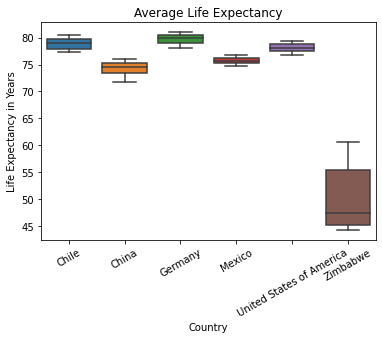

<Figure size 432x288 with 0 Axes>

In [12]:
sns.boxplot(y='life_year', x='Country', data=data)
plt.xticks(rotation=30)
plt.title('Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Life Expectancy in Years')
plt.show()
plt.clf()

The boxplot show that Zimbabwe is lower in average life expectancy compared to other countries.

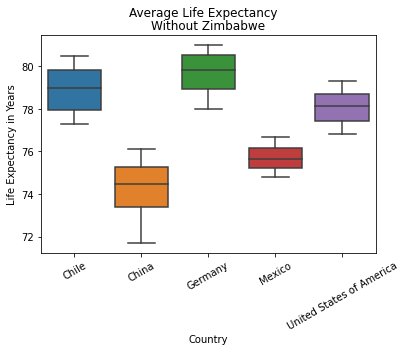

<Figure size 432x288 with 0 Axes>

In [13]:
data_not_zimb = data[data.Country != 'Zimbabwe']
sns.boxplot(y='life_year', x='Country', data=data_not_zimb)
plt.xticks(rotation=30)
plt.suptitle('Average Life Expectancy')
plt.title('Without Zimbabwe')
plt.xlabel('Country')
plt.ylabel('Life Expectancy in Years')
plt.show()
plt.clf()

A boxplot show all average life expectancies except for Zimbabwe.

In [14]:
print('Average Life Expectancy for all Countries')
data.groupby('Country').mean().life_year.round(2)

Average Life Expectancy for all Countries


Country
Chile                       78.94
China                       74.26
Germany                     79.66
Mexico                      75.72
United States of America    78.06
Zimbabwe                    50.09
Name: life_year, dtype: float64

## Distribution of Life Expectancy for all Countries

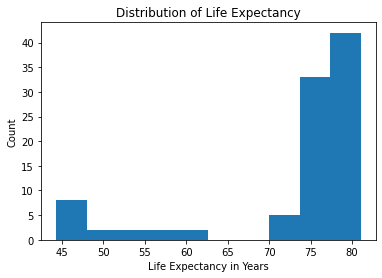

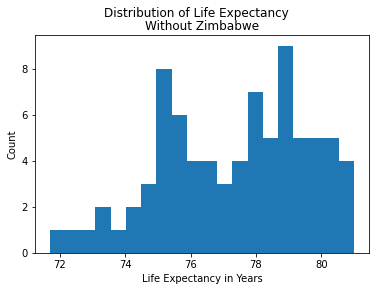

Histogram Charts Comparing all Countries


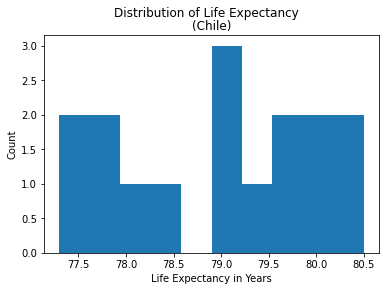

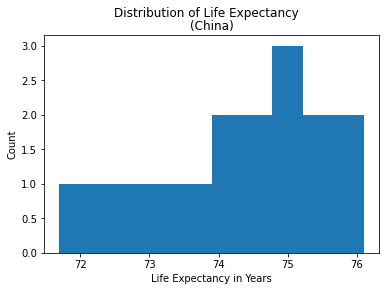

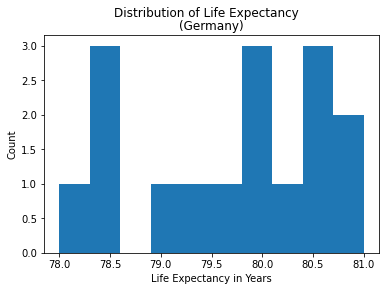

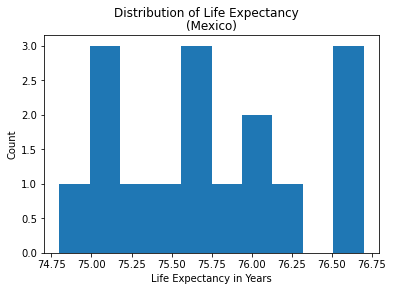

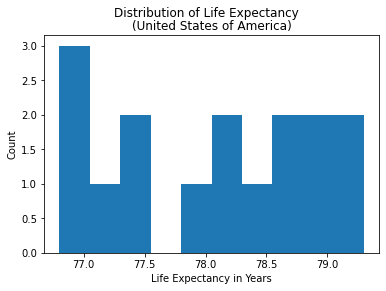

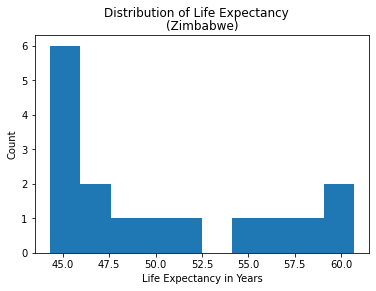

<Figure size 432x288 with 0 Axes>

In [15]:
plt.hist(data.life_year, bins=10)
plt.title('Distribution of Life Expectancy')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(data_not_zimb.life_year, bins=20)
plt.suptitle('Distribution of Life Expectancy')
plt.title('Without Zimbabwe')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
print('Histogram Charts Comparing all Countries')
plt.hist(chile.life_year, bins = 10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(Chile)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(china.life_year, bins = 10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(China)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(germany.life_year, bins=10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(Germany)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(mexico.life_year, bins=10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(Mexico)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(usa.life_year, bins=10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(United States of America)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()
plt.hist(zimb.life_year, bins = 10)
plt.suptitle('Distribution of Life Expectancy')
plt.title('(Zimbabwe)')
plt.ylabel('Count')
plt.xlabel('Life Expectancy in Years')
plt.show()
plt.clf()

## Conclusion

The analysis cover various topics which attempts to find the results of GDP and Life Expectancy of 6 countries: 
1. Chile 
2. China
3. Germany
4. Mexico
5. United States of America
6. Zimbabwe

The objectives that the analysis attempted to resolve:

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

The analysis shows that the country, Zimbabwe, is considered an outliner for other countries as it is scaled significantly lower in GDP and life expectancy. Charts are adjusted to show all countries in one chart. Also, there are charts separating countries to show better visualizations. The analysis found that all 6 nations saw an increase in life expectancy over time. It is the same true for GDP over time. There is a strong positive relationship between GDP and Life expectancy for all countries using Pearson Coefficient. All countries have a range of 70 to 80 average life expectancy except Zimbabwe which averaged 50.09 years. The histograms and boxplots are used to visualize the countries' average life expectancy.